<a href="https://colab.research.google.com/github/grahyachowdary/Knee-Osteoporosis/blob/main/knee_idp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/content/patient details (1).csv")
df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,NaN,1.64592,65,yes,no,...,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,...,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,...,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,...,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5,OP5,yes,female,40,NaN,1.49352,54,no,no,...,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,yes,female,56,NaN,1.54000,80,no,no,...,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,osteopenia
236,237,OS49,yes,male,55,NaN,1.53000,63,no,no,...,no,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,osteoporosis
237,238,OP153,yes,male,49,NaN,1.67000,88,no,no,...,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,osteopenia
238,239,OP154,yes,female,56,48.0,1.52000,68,no,no,...,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia


In [3]:
df.isnull().sum()

,0
S.No,0
Patient Id,0
Joint Pain:,0
Gender,0
Age,0
Menopause Age,157
height (meter),0
Weight (KG),0
Smoker,0
Alcoholic,0


In [4]:
# Custom function to fill NaN values based on gender
def fill_values(row):
    if row['Gender'] == 'female':
        if pd.isnull(row['Menopause Age']):
            row['Menopause Age'] = 0
            row['Number of Pregnancies']=0

    elif row['Gender'] == 'male':
        if pd.isnull(row['Menopause Age']):
            row['Menopause Age'] = -1
            row['Number of Pregnancies']=-1

    return row

# Apply the custom function to each row
df = df.apply(fill_values, axis=1)

In [5]:
df.isnull().sum()

,0
S.No,0
Patient Id,0
Joint Pain:,0
Gender,0
Age,0
Menopause Age,0
height (meter),0
Weight (KG),0
Smoker,0
Alcoholic,0


In [6]:
  cleaned_df = df.dropna()

In [7]:
cleaned_df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,-1.0,1.64592,65,yes,no,...,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,...,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,...,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,...,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5,OP5,yes,female,40,0.0,1.49352,54,no,no,...,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,yes,female,56,0.0,1.54000,80,no,no,...,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,osteopenia
236,237,OS49,yes,male,55,-1.0,1.53000,63,no,no,...,no,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,osteoporosis
237,238,OP153,yes,male,49,-1.0,1.67000,88,no,no,...,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,osteopenia
238,239,OP154,yes,female,56,48.0,1.52000,68,no,no,...,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia


In [8]:
cleaned_df.isnull().sum()

,0
S.No,0
Patient Id,0
Joint Pain:,0
Gender,0
Age,0
Menopause Age,0
height (meter),0
Weight (KG),0
Smoker,0
Alcoholic,0


In [9]:
cleaned_df.shape

(231, 28)

In [10]:
%%capture
# Replace specific values in 'Obesity' column
cleaned_df['Obesity'] = cleaned_df['Obesity'].replace(to_replace={'overweight': 'over weight', 'underweight': 'under weight', ' normalweight': 'normal weight'})

In [11]:
%%capture
# Map 'Diagnosis' to numerical values
diagnosis_mapping = {'osteopenia': 0, 'normal': 1, 'osteoporosis': 2}
cleaned_df['Diagnosis'] = cleaned_df['Diagnosis'].map(diagnosis_mapping)

In [12]:
cleaned_df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,-1.0,1.64592,65,yes,no,...,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,0
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,...,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,0
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,...,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,0
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,...,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,0
4,5,OP5,yes,female,40,0.0,1.49352,54,no,no,...,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,yes,female,56,0.0,1.54000,80,no,no,...,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,0
236,237,OS49,yes,male,55,-1.0,1.53000,63,no,no,...,no,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,2
237,238,OP153,yes,male,49,-1.0,1.67000,88,no,no,...,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,0
238,239,OP154,yes,female,56,48.0,1.52000,68,no,no,...,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,over weight,0


In [13]:
X = cleaned_df.drop(columns=['Diagnosis'])
y = cleaned_df['Diagnosis']

In [14]:
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
num_cols = [col for col in X.columns if X[col].dtype != 'object']

In [15]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [16]:
%%capture
# Frequency encoding for Daily Eating habits
daily_eating_freq = cleaned_df['Daily Eating habits'].value_counts(normalize=True)
cleaned_df['Daily Eating habits'] = cleaned_df['Daily Eating habits'].map(daily_eating_freq)

# Frequency encoding for Medical History
medical_history_freq = cleaned_df['Medical History'].value_counts(normalize=True)
cleaned_df['Medical History'] = cleaned_df['Medical History'].map(medical_history_freq)

# Frequency encoding for Obesity
obesity_freq = cleaned_df['Obesity'].value_counts(normalize=True)
cleaned_df['Obesity'] = cleaned_df['Obesity'].map(obesity_freq)

In [17]:
%%capture
import joblib
for col in cat_cols:
    le = LabelEncoder()
    cleaned_df[col] = le.fit_transform(cleaned_df[col].astype(str))
    label_encoders[col] = le

# Save the encoders for later use
joblib.dump(label_encoders, 'label_encoders.joblib')

In [18]:
cleaned_df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,35,1,1,65,-1.0,1.64592,65,1,0,...,0,0.2,5,0,-1.98,0.73,23.993627,0,1,0
1,2,99,1,0,54,46.0,1.67640,78,0,0,...,0,1.0,5,0,-2.26,-2.71,27.754876,0,3,0
2,3,110,1,0,49,43.0,1.37160,59,0,0,...,0,1.0,4,8,-1.92,-1.51,31.361517,0,2,0
3,4,120,1,0,57,40.0,1.52400,72,0,0,...,0,2.0,3,5,-2.23,-1.13,31.000062,0,2,0
4,5,131,1,0,40,0.0,1.49352,54,0,0,...,0,2.0,5,0,-1.81,-1.05,24.208711,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,92,1,0,56,0.0,1.54000,80,0,0,...,1,0.2,5,0,-1.97,-1.34,33.732501,0,2,0
236,237,225,1,1,55,-1.0,1.53000,63,0,0,...,0,6.0,5,0,-2.99,-2.42,26.912726,0,3,2
237,238,93,1,1,49,-1.0,1.67000,88,0,0,...,1,0.5,5,1,-1.72,-1.21,31.553659,0,2,0
238,239,94,1,0,56,48.0,1.52000,68,0,0,...,1,0.2,0,0,-2.01,-1.13,29.432133,0,3,0


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation coefficient matrix for the cleaned dataframe
correlation_matrix = X.corr()

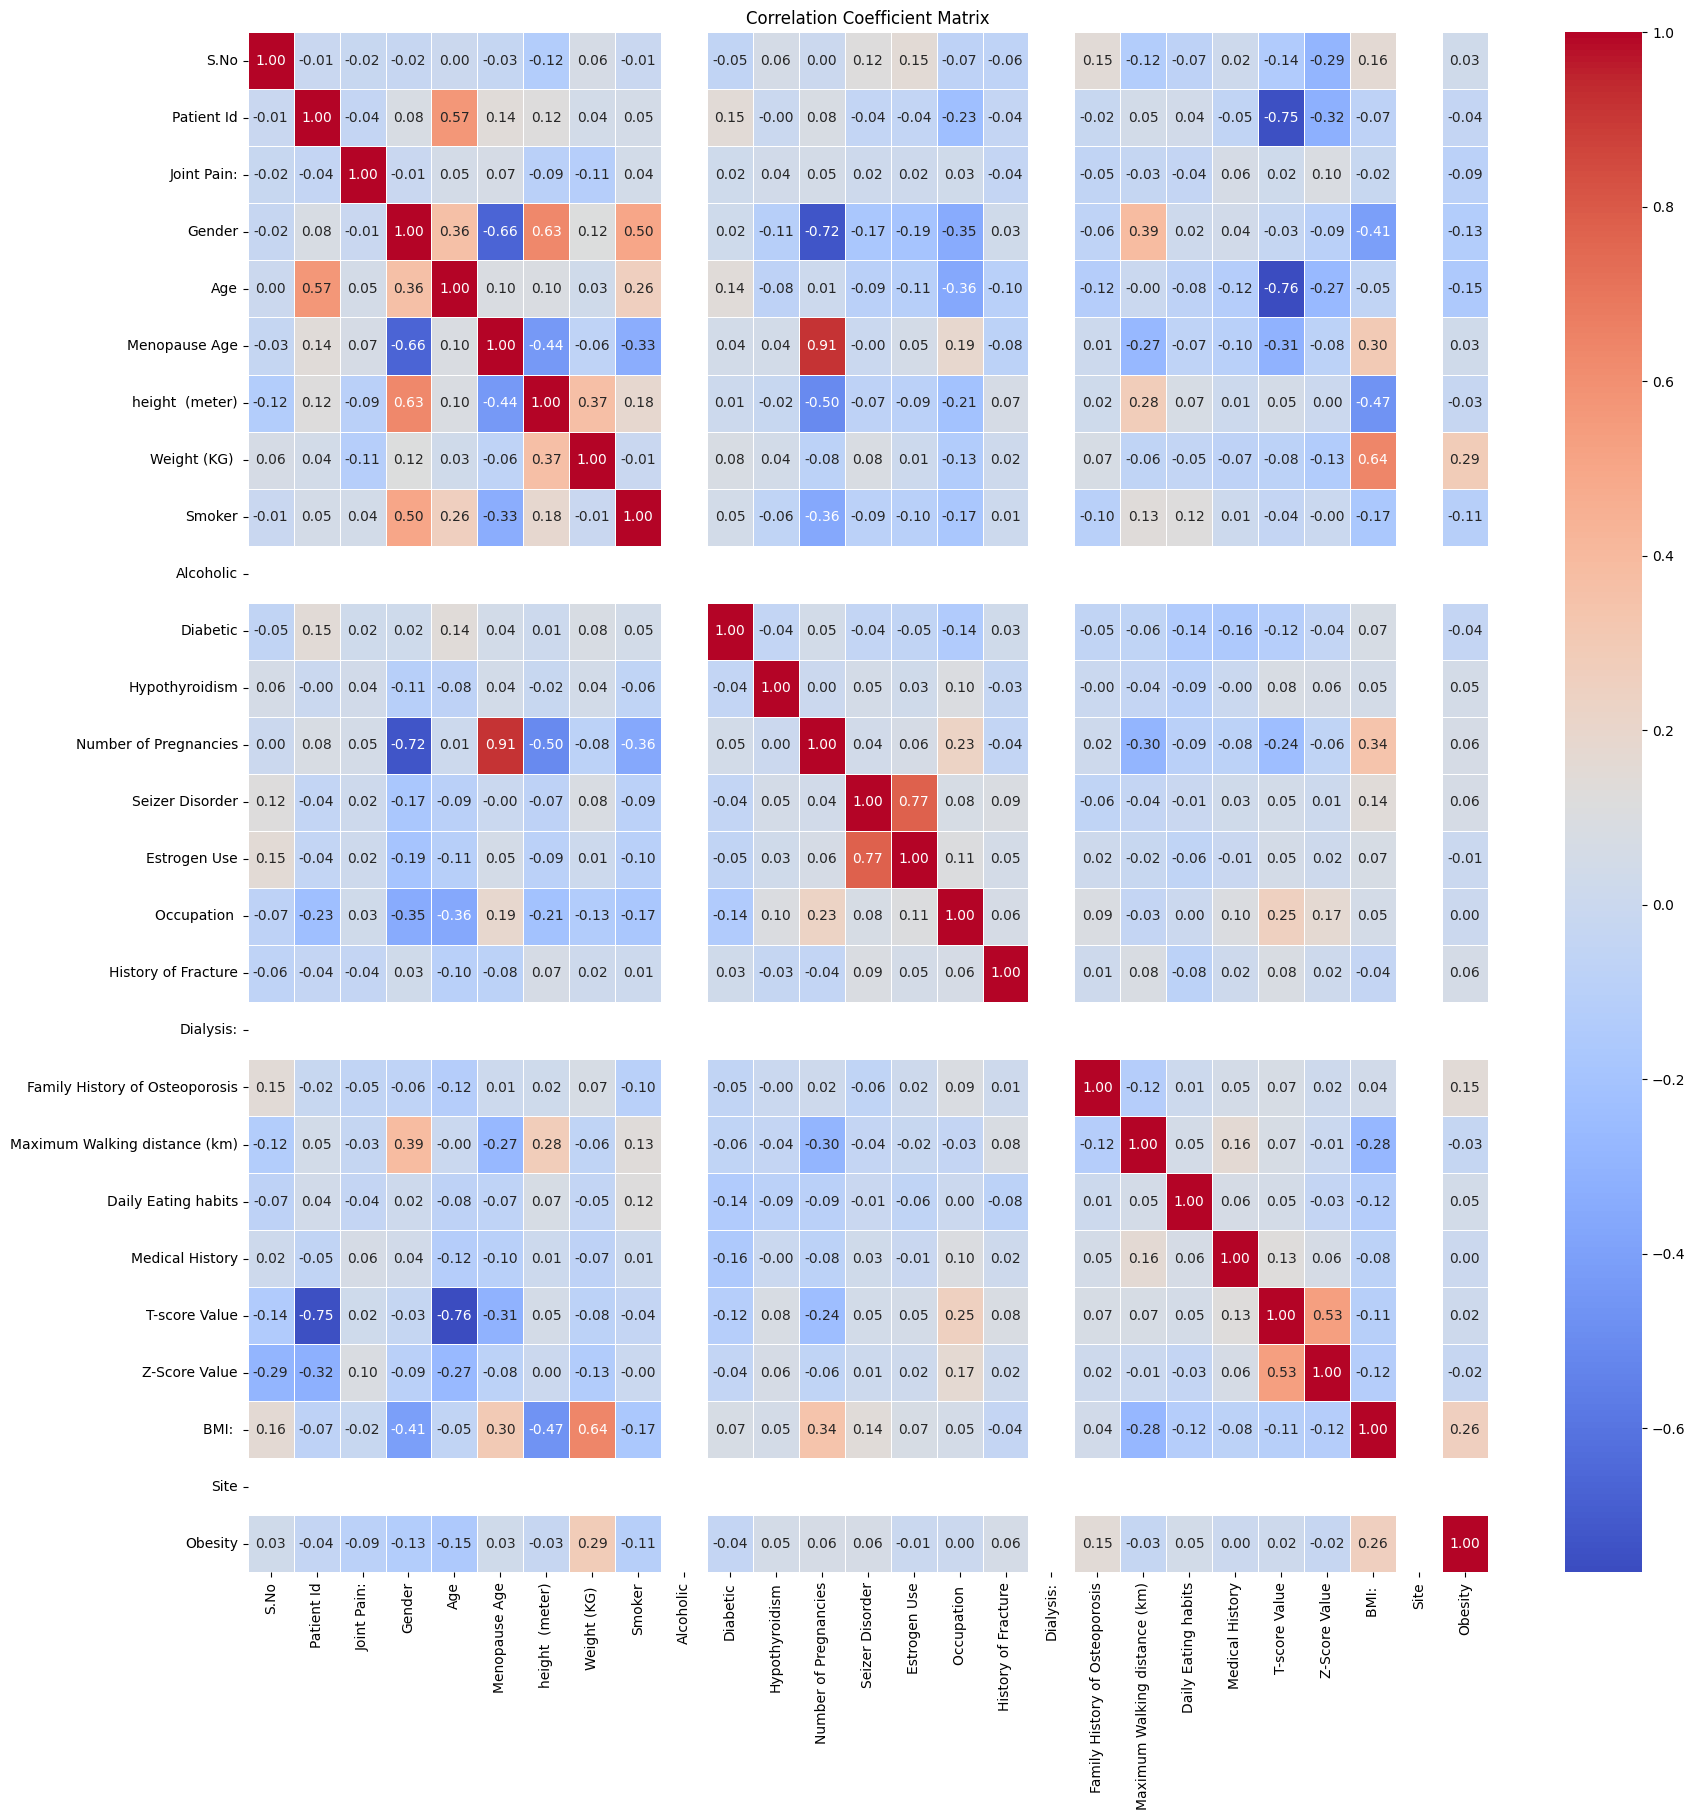

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Coefficient Matrix')
plt.show()

In [21]:
cleaned_df=cleaned_df.drop(columns=['S.No','Patient Id','Site','Number of Pregnancies','Z-Score Value','Estrogen Use'])


In [22]:
X = cleaned_df.drop(columns=['Diagnosis'])
y = cleaned_df['Diagnosis']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [24]:
print(cleaned_df['Diagnosis'].value_counts())

Diagnosis
0    149
2     47
1     35
Name: count, dtype: int64


/tmp/ipython-input-2942347077.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=cleaned_df['Diagnosis'], palette=custom_palette)


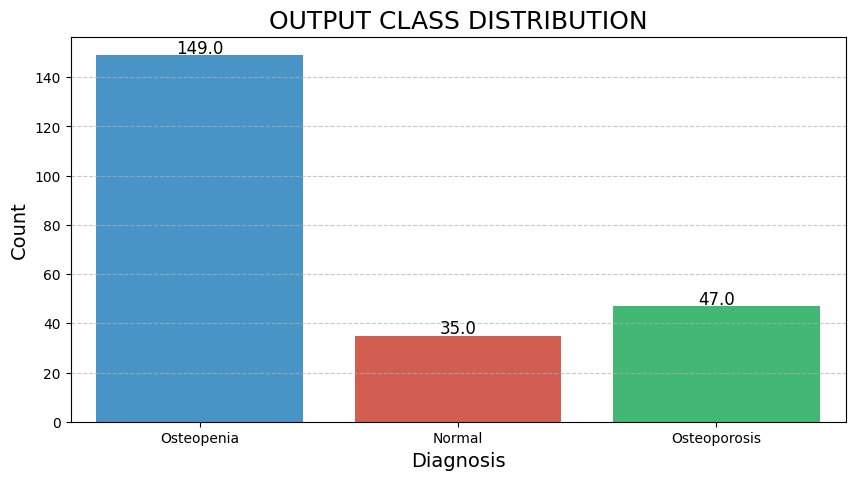

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define custom colors
custom_palette = ["#3498db", "#e74c3c", "#2ecc71"]

# Map the diagnosis numerical values back to their original labels
label_mapping = {0: 'Osteopenia', 1: 'Normal', 2: 'Osteoporosis'}
cleaned_df['Diagnosis'] = cleaned_df['Diagnosis'].map(label_mapping)

# Create the countplot with custom colors
plt.figure(figsize=(10, 5))
sb.countplot(x=cleaned_df['Diagnosis'], palette=custom_palette)

# Add title and labels
plt.title('OUTPUT CLASS DISTRIBUTION', fontsize=18)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations on each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

In [26]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [27]:
print(pd.Series(y_train_res).value_counts())

Diagnosis
0    104
1    104
2    104
Name: count, dtype: int64


/tmp/ipython-input-4142262828.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=y_train_res_mapped, palette=custom_palette)


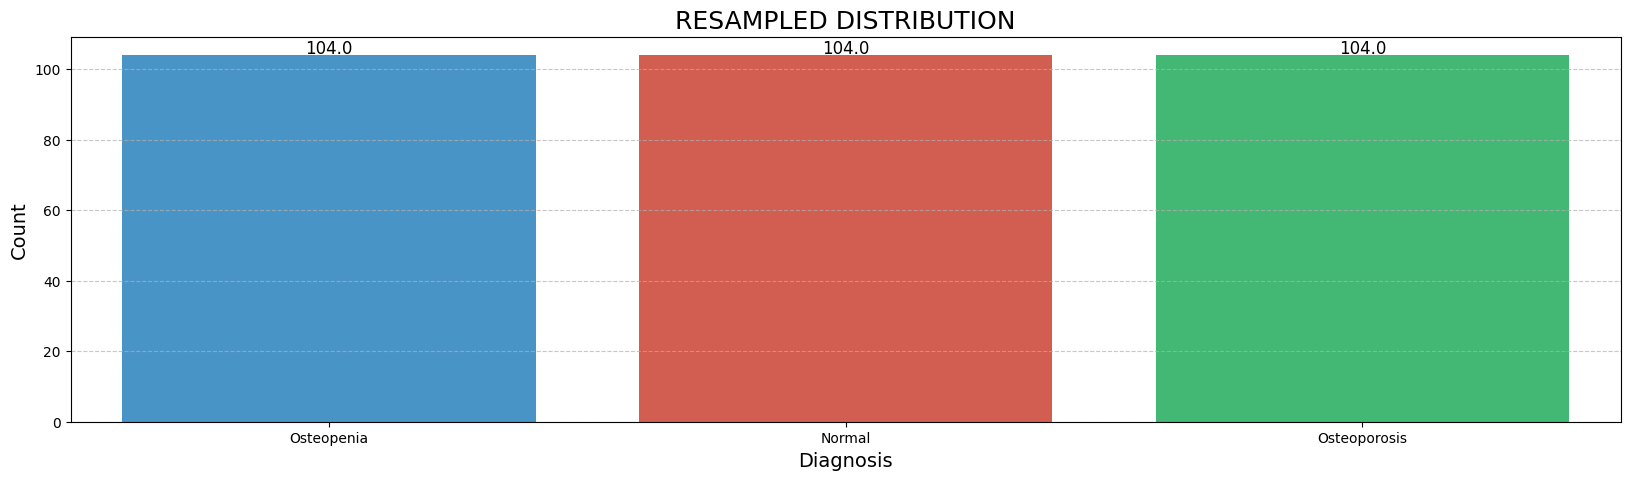

In [28]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define custom colors
custom_palette = ["#3498db", "#e74c3c", "#2ecc71"]

# Map the diagnosis numerical values back to their original labels
label_mapping = {0: 'Osteopenia', 1: 'Normal', 2: 'Osteoporosis'}
y_train_res_mapped = pd.Series(y_train_res).map(label_mapping)

# Create the countplot with custom colors
plt.figure(figsize=(20, 5))
sb.countplot(x=y_train_res_mapped, palette=custom_palette)

# Add title and labels
plt.title('RESAMPLED DISTRIBUTION', fontsize=18)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations on each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

In [29]:
cleaned_df

,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,Diabetic,Hypothyroidism,...,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,BMI:,Obesity,Diagnosis
0,1,1,65,-1.0,1.64592,65,1,0,0,0,...,35,0,0,0.2,5,0,-1.98,23.993627,1,Osteopenia
1,1,0,54,46.0,1.67640,78,0,0,0,0,...,35,0,0,1.0,5,0,-2.26,27.754876,3,Osteopenia
2,1,0,49,43.0,1.37160,59,0,0,0,1,...,29,0,0,1.0,4,8,-1.92,31.361517,2,Osteopenia
3,1,0,57,40.0,1.52400,72,0,0,0,1,...,35,0,0,2.0,3,5,-2.23,31.000062,2,Osteopenia
4,1,0,40,0.0,1.49352,54,0,0,0,0,...,35,0,0,2.0,5,0,-1.81,24.208711,1,Osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,0,56,0.0,1.54000,80,0,0,0,1,...,35,0,1,0.2,5,0,-1.97,33.732501,2,Osteopenia
236,1,1,55,-1.0,1.53000,63,0,0,0,0,...,35,0,0,6.0,5,0,-2.99,26.912726,3,Osteoporosis
237,1,1,49,-1.0,1.67000,88,0,0,0,0,...,3,0,1,0.5,5,1,-1.72,31.553659,2,Osteopenia
238,1,0,56,48.0,1.52000,68,0,0,0,0,...,35,0,1,0.2,0,0,-2.01,29.432133,3,Osteopenia


In [30]:
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_features='sqrt',
    max_depth=10,
    min_samples_split=65,
    min_samples_leaf=60,
    #Reducing this further reduces the accuracy. Increasing this shoots up the accuracy and reduces overfitting risks, but increases computational complexity.
    bootstrap=True,
    random_state=24
)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, min_samples_leaf=60, min_samples_split=65,
                       n_estimators=1000, random_state=24)

/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


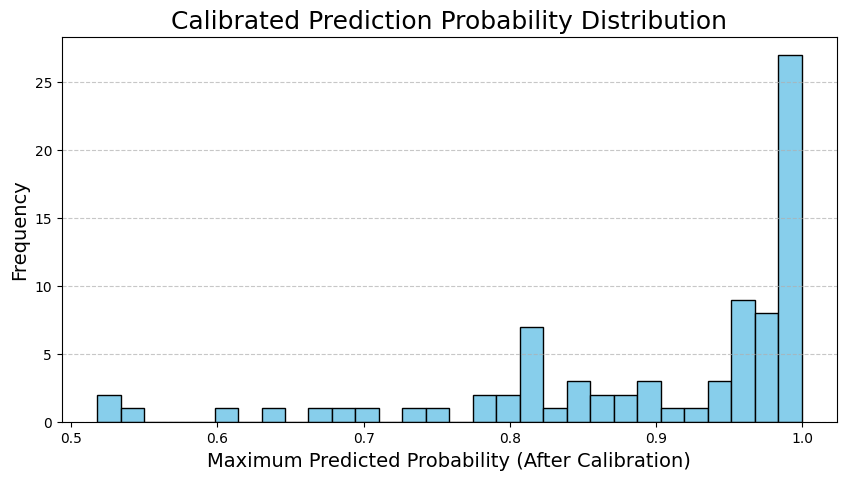

In [31]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf = CalibratedClassifierCV(rf_model, method='sigmoid', cv='prefit')
calibrated_rf.fit(X_train_res, y_train_res)

# Predict probabilities for the test set using the calibrated model
y_prob_calibrated = calibrated_rf.predict_proba(X_test)

# Plot the histogram of maximum predicted probabilities after calibration
import matplotlib.pyplot as plt
import numpy as np

y_prob_calibrated_max = np.max(y_prob_calibrated, axis=1)

plt.figure(figsize=(10, 5))
plt.hist(y_prob_calibrated_max, bins=30, color='skyblue', edgecolor='black')
plt.title('Calibrated Prediction Probability Distribution', fontsize=18)
plt.xlabel('Maximum Predicted Probability (After Calibration)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
train_accuracy = calibrated_rf.score(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate and print test accuracy
test_accuracy = calibrated_rf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9904
Test Accuracy: 0.9383


In [33]:
y_pred = calibrated_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.86      0.95      0.90        20
           2       1.00      0.94      0.97        16

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81



In [34]:
model_filename = "calibrated_random_forest_model_smote1.joblib"
dump(calibrated_rf, model_filename)

['calibrated_random_forest_model_smote1.joblib']

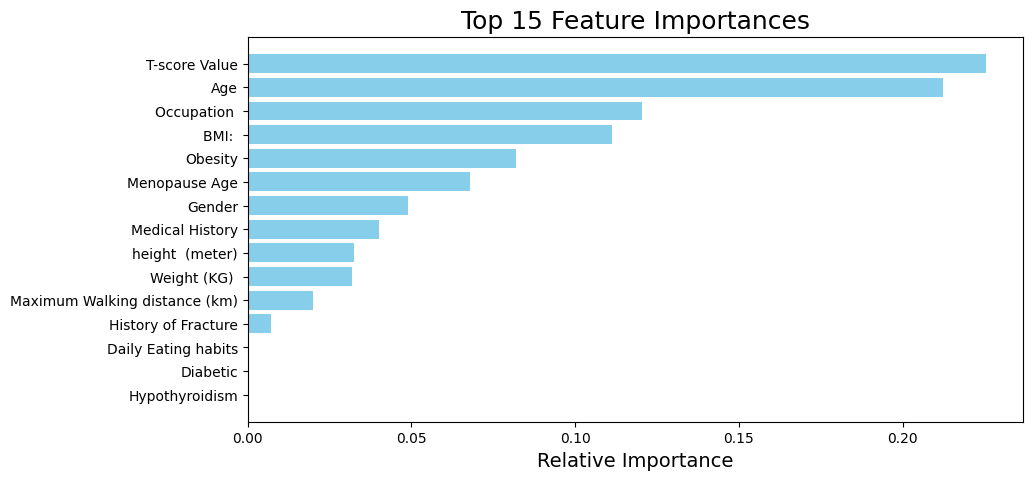

In [35]:
import numpy as np
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]
plt.figure(figsize=(10, 5))
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 15 Feature Importances', fontsize=18)
plt.xlabel('Relative Importance', fontsize=14)
plt.show()

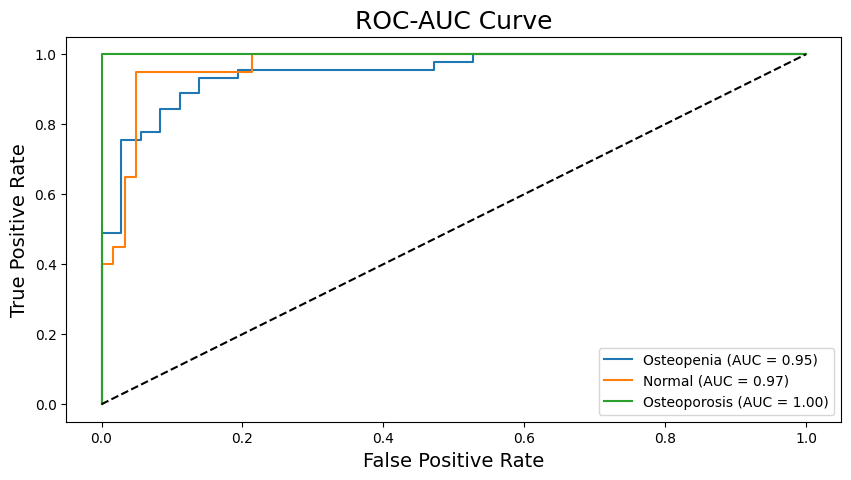

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

y_prob = rf_model.predict_proba(X_test)
plt.figure(figsize=(10, 5))

for i in range(len(label_mapping)):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f'{list(label_mapping.values())[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-AUC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best')
plt.show()

In [37]:
from joblib import load
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the saved random forest model
model = load('calibrated_random_forest_model_smote1.joblib')

push_df=pd.DataFrame(X_test)

# Convert integer labels in y_test to string labels
label_mapping = {0: "Osteoporosis", 1: "Normal", 2: "Osteopenia"}
y_test_labels = [label_mapping[label] for label in y_test]
push_df['Diagnosis'] = y_test_labels


# Randomly select rows from the cleaned dataframe
num_samples = 50  # Specify the number of samples you want to randomly pick
sample_df = push_df.sample(n=num_samples, random_state=1)
diagnosis_df = sample_df['Diagnosis']
sample_df = sample_df.drop(columns=['Diagnosis'])

# Handle missing values
sample_df['Menopause Age'] = sample_df['Menopause Age'].fillna(0)
label_encoders = {}
for column in sample_df.columns:
    if sample_df[column].dtype == object:
        le = LabelEncoder()
        sample_df[column] = le.fit_transform(sample_df[column])
        label_encoders[column] = le

# Make predictions using the loaded model
predictions = model.predict(sample_df)

# Convert predictions to human-readable labels
prediction_mapping = {2: "Osteopenia", 1: "Normal", 0: "Osteoporosis"}
predicted_labels = [prediction_mapping[prediction] for prediction in predictions]

# Create a DataFrame with all information
result_df = pd.DataFrame(sample_df)
result_df['Diagnosis'] = diagnosis_df
result_df['Predicted Diagnosis'] = predicted_labels

# Save the DataFrame to a CSV file
result_df.to_csv('prediction_results.csv', index=False)

In [38]:
correct_predictions = (y_pred == y_test).astype(int)

In [39]:
visualization_df = pd.DataFrame({
    'Entry': range(len(y_test)),
    'Correct': correct_predictions
})

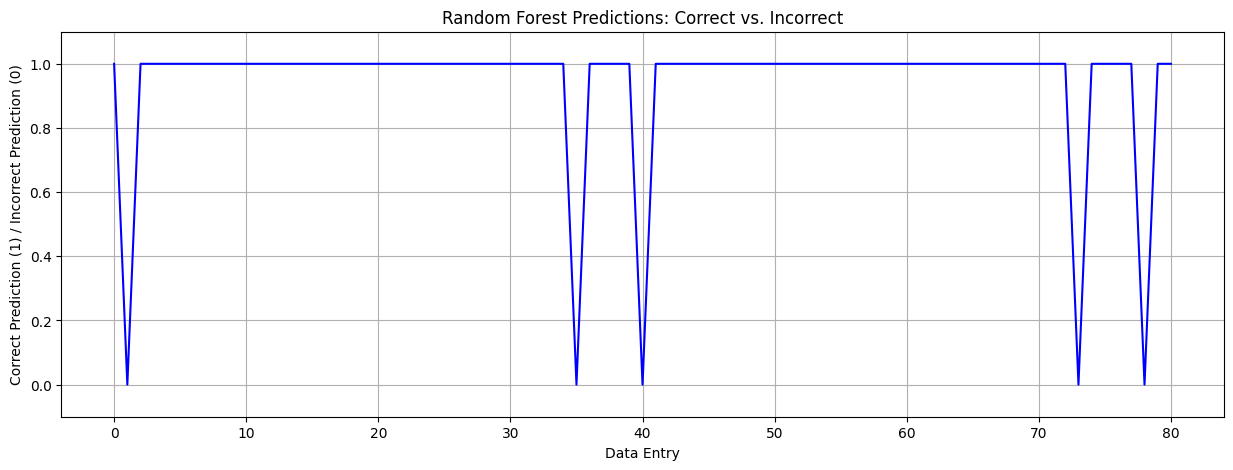

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(visualization_df['Entry'], visualization_df['Correct'], linestyle='-', color='b')
plt.ylim(-0.1, 1.1)
plt.xlabel('Data Entry')
plt.ylabel('Correct Prediction (1) / Incorrect Prediction (0)')
plt.title('Random Forest Predictions: Correct vs. Incorrect')
plt.grid(True)
plt.show()